In assignment 1, you created a logistic regression model for the Caravan Insurance dataset.  

1. Visualize  the ROC curve by changing the probability threshold for that model 
2. Report the Area Under Curve (AUC) 

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing as preproc
from sklearn import metrics

from sklearn import linear_model
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder


In [2]:
df = pd.read_csv("Caravan.csv")
df.head()

,Unnamed: 0,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,...,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,Purchase
0,1,33,1,3,2,8,0,5,1,3,...,0,0,0,1,0,0,0,0,0,No
1,2,37,1,2,2,8,1,4,1,4,...,0,0,0,1,0,0,0,0,0,No
2,3,37,1,2,2,8,0,4,2,4,...,0,0,0,1,0,0,0,0,0,No
3,4,9,1,3,3,3,2,3,2,4,...,0,0,0,1,0,0,0,0,0,No
4,5,40,1,4,2,10,1,4,1,4,...,0,0,0,1,0,0,0,0,0,No


In [3]:
#Logistic regression works with numbers not strings so converting the entries "YES" and "No" as 1 and 0
le = LabelEncoder()
label = le.fit_transform(df['Purchase'])
# printing label
label
df.drop("Purchase", axis=1, inplace=True)
# Appending the array to our dataFrame with column name 'Purchase'
df["Purchase"] = label
df

,Unnamed: 0,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,...,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,Purchase
0,1,33,1,3,2,8,0,5,1,3,...,0,0,0,1,0,0,0,0,0,0
1,2,37,1,2,2,8,1,4,1,4,...,0,0,0,1,0,0,0,0,0,0
2,3,37,1,2,2,8,0,4,2,4,...,0,0,0,1,0,0,0,0,0,0
3,4,9,1,3,3,3,2,3,2,4,...,0,0,0,1,0,0,0,0,0,0
4,5,40,1,4,2,10,1,4,1,4,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5817,5818,36,1,1,2,8,0,6,1,2,...,0,0,0,1,0,0,0,0,0,0
5818,5819,35,1,4,4,8,1,4,1,4,...,0,0,0,1,0,0,0,0,0,0
5819,5820,33,1,3,4,8,0,6,0,3,...,0,0,0,1,0,0,0,0,0,1
5820,5821,34,1,3,2,8,0,7,0,2,...,0,0,0,0,0,0,0,0,0,0


In [4]:
X = df.drop(columns = ['Purchase'])
y = df.Purchase


In [5]:
#Training and Testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [6]:
clf = linear_model.LogisticRegression(C=1e5, solver='lbfgs')
print(clf.fit(X_train, y_train))

LogisticRegression(C=100000.0)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [7]:
clf.coef_

array([[ 3.47547743e-05,  6.75589595e-03, -4.33811639e-02,
        -6.09215763e-02,  2.77537196e-02, -3.51089106e-02,
        -4.60180418e-02, -2.51411719e-02,  1.99694134e-02,
        -1.03835252e-01,  4.70010377e-03, -8.99503503e-02,
        -5.66402569e-02, -8.04635108e-02, -4.44226438e-02,
        -7.73679128e-02,  3.27016371e-02, -4.22826308e-02,
        -1.67943643e-01, -1.23913468e-02,  1.71508646e-02,
        -1.04906939e-01,  2.16022762e-02, -1.57569207e-02,
        -1.07973537e-02, -2.87471636e-02, -4.06923514e-02,
        -9.22806599e-02,  1.65154965e-02, -7.95911295e-03,
        -9.36534869e-02, -8.30086611e-02, -4.89243472e-03,
        -6.96857055e-02, -6.29886469e-02, -3.53000742e-02,
        -1.38724823e-01, -5.10788522e-02, -4.52545530e-02,
        -2.55742800e-02,  6.91505962e-02, -1.65220205e-02,
        -2.12051471e-04,  4.64887326e-02,  9.70060232e-02,
        -1.17929885e-02, -6.18722751e-02,  2.20517611e-01,
        -1.26510808e-02, -1.14712827e-02, -9.34207644e-0

In [8]:
clf.classes_

array([0, 1])

In [9]:
clf.intercept_

array([-0.01870624])

In [10]:
y_pred=clf.predict(X_test)

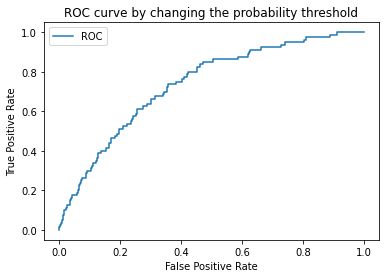

In [11]:
# metrics
y_pred_proba = clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

#Plotting the  ROC curve
plt.title('ROC curve by changing the probability threshold')
plt.plot(fpr,tpr,label='ROC')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()

In [12]:
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#print AUC score
print(auc)

0.7364285714285713
